## Machine leanring - Linear Regression model
#### All you need to know about linear regression

Thalia - 2020/03/20

**Key takeaways:**
* **What does it mean to "train a model"?**
> Training a model means finding the set of parameters which make the model best fit the training set according to the selected performance measure.
* **What is the most commonly used performance measure for regression models?**
> **MSE** (Mean Squared Error), **RMSE** (Root Mean Squared Error), **MAE** (Mean Absolute Error), $\boldsymbol{𝑅^2}$ (Coefficient of Determination)
* **What is Ordinary Least Square Regression?**
> Ordinary Least Square method is a way to train the linear regression model. It minimize $\text{MSE}(\theta)$ by setting its derivative to be 0, and then solve for the parameters of the linear regression model. The closed-form solution obtained is called Normal Equation. 
* **What is Gradient Descent?**
 > - **Batch Gradient Descent** uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.
 > - **Stochastic Gradient Descent** picks only one random instance at every step and computes the gradients based only on that single instance.
 >- **Mini-Batch Gradient Descent** computes the gradients on small random sets of instances and it can boost performance from hardware optimization. 
* **What's epoch? What is its relationship with batch size?**
> During the gradient descent, we iterate by rounds of $n$ iterations ($n=\frac{\text{Size of the training set}}{\text{Batch size}}$), each round is called an epoch. 
> - **Epoch** is the number of times you go though the whole training set during the model training process.
> - **Batch size** is the number of samples each iteration use for updating parameters. 
* **What is Penalized Linear Regression Model?**

## Linear Regression Model

**Linear regression model** makes prediction of dependent variable $y$ based on the given independent variable **$x \in \mathbb{R}^n$** by finding out a $\color{red}{\text{linear}}$ relationship, meaning it assumes the predicted value can be expressed as a linear combination of the input variable. 

$$\hat{y} = \theta_0 + \theta_1 x_1 +...+ \theta_n x_n $$

Or written in vectorized form:

$$\hat{\boldsymbol{y}} = \boldsymbol{\theta}^T\boldsymbol{x}$$

Where 
$$\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} \qquad \text{and} \qquad \boldsymbol{x} = \begin{bmatrix} 1 \\ x_1 \\ \vdots \\ x_n \end{bmatrix}$$

The equation above is for a single data point, the vectorized version of the whole data set is:

$$\boldsymbol{\hat{Y}} = \boldsymbol{\theta}^T\boldsymbol{X}$$

Where

$$\boldsymbol{X} = \begin{bmatrix} \vdots & \vdots & & \vdots \\ \boldsymbol{x}^{(1)} & \boldsymbol{x}^{(2)} & \dots & \boldsymbol{x}^{(m)} \\ \vdots & \vdots & & \vdots \end{bmatrix} \qquad \text{and} \qquad \boldsymbol{\hat{Y}} = \begin{bmatrix} \boldsymbol{\hat{y}^{(1)}} & \boldsymbol{\hat{y}^{(2)}} & \dots \boldsymbol{\hat{y}^{(m)}}\end{bmatrix}$$

**Note**: the subscript $x_i$ means the i-th item of vector $\boldsymbol{x}$, the superscript $x^{(i)}$ means the i-th sample in the training set.

When we train a linear regression model, we want to find the parameters $\boldsymbol{\theta}: [\theta_0, \theta_1,..., \theta_n]$ such that the model best fits the training set (of size $m$) $\{\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...., \boldsymbol{x}^{(m)} \}$. To do that, we need to have a performance measurement to help us determine how good the model is. 

### Performance measure

Some commonly used performance measures of regression models are:

| Measure  | Equation| Sklearn Function|
|:-------------|:------------:|:------------|
| $\boldsymbol{\text{MSE}}$ (Mean Squared Error)   | <div style="width:240px">$\frac{1}{m}\Sigma_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$ </div> | sklearn.metrics.mean_squared_error(squared=False)|
| $\boldsymbol{\text{RMSE}}$ (Root Mean Squared Error) | $\sqrt{\frac{1}{m}\Sigma_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})}$|sklearn.metrics.mean_squared_error(squared=True) |
| $\boldsymbol{\text{MAE}}$ (Mean Absolute Error) |  $\frac{1}{m}\Sigma_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})$ | sklearn.metrics.mean_absolute_error()|
|$R^2$ (Coefficient of Determination)|<div style="height:40px">$\frac{\Sigma_{i=1}^{m}(\hat{y}^{(i)} - \bar{y})}{\Sigma_{i=1}^{m}(y^{(i)} - \bar{y})}$</div>|sklearn.metrics.r2_score()|

Among which the most popular one is the Root Mean Square Error (RMSE). However, it is simpler to minimize the Mean Square Error than the RMSE in practice, and it leads to the same result. Thus, the problem we are trying to solve by training a linear regression model is actually an optimization problem:

$$
\begin{align}
\min\limits_{\theta_0,...,\theta_n}\text{MSE}(\theta) &= \min\limits_{\theta_0,...,\theta_n}(\frac{1}{m}\Sigma_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2)\\
&=\min\limits_{\theta_0,...,\theta_n}(\frac{1}{m}\Sigma_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})^2) \\
&= \min\limits_{\theta_0,...,\theta_n}||\theta^{T}X - Y||^2
\end{align}$$

Where $||.||$ is the l2 norm.

> **L-2 Norm**
>
> Given a vector $\boldsymbol{x} = [x_1, x_2, \dots ,x_n]^T$,  its l-2 norm is defined as
> $$||\boldsymbol{x}|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$$
>  A property of L-2 norm:
> $$||\boldsymbol{x}||^2 = \boldsymbol{x}^T \cdot \boldsymbol{x}  $$
 
We can actually solve this optimization problem with high school calculus - setting the derivative of the objective function w.r.t the parameter to be 0 and solve for the parameter!

$$ \begin{align}
\text{MSE}(\theta) &= ||\boldsymbol{\theta}^{T}X - Y||^2 \\
&= (\boldsymbol{\theta}^{T}X - Y)^T(\boldsymbol{\theta}^{T}X - Y) \\
&= X^T\boldsymbol{\theta}\boldsymbol{\theta}^TX - X^T \boldsymbol{\theta} Y - Y^T\boldsymbol{\theta}^TX + Y^T Y
\end{align}$$

Thus,
$$ \begin{align}
\nabla_{\theta}\text{MSE}(\theta) &= \nabla_{\theta}(X^T\boldsymbol{\theta}\boldsymbol{\theta}^TX - X^T \boldsymbol{\theta} Y - Y^T\boldsymbol{\theta}^TX + Y^T Y) \\
&= 2X^T X\boldsymbol{\theta} - 2X^TY \\
&= X^T X\boldsymbol{\theta} - X^TY \\
&= 0
\end{align}$$

Solve for $\boldsymbol{\theta}$ gives: $\hat{\theta} = (\boldsymbol{X}^T \cdot \boldsymbol{X})^{-1} \cdot \boldsymbol{X}^T \cdot Y$ This equation is called **Normal Equation** and this method of solving for parameters of linear regression model is called **Ordinary Least Squares (OLS)**  method.

Howeve, the calculation of normal equation chould be very slow when the number of dimension grows vert large, because it involves the calculation of the inverse of matrix $X^TX$. In the case of large dataset, we can use a numerical method: Gradient Descent for this optimization problem.

### Gradient Descent

Gradient descent is a perfect numerical method for solving the optimization problem above, because the MSE of a Linear Regression model is a convex function. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: **Gradient Descent is guaranteed to approach arbitrarily close the global minimum**.

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. You start by initializing $\theta$ with random values, and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum (gradient is zero). The size of the steps is determined by the **learning rate** hyperparameter $\eta$.

$$\theta^{\text{next step}} = \theta^{\text{current}} - \eta\nabla_{\theta}\text{MSE}(\theta)$$

$\color{red}{\text{Recall the MSE($\theta$) is a function of all $m$ samples, the formula above uses the whole batch of training data at every step to update the parameter } \theta}$. Therefore, the algorithm is called **Batch Gradient Descent**. The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

At the opposite extreme, **Stochastic Gradient Descent** $\color{red}{\text{picks only one random instance in the training set}}$ at every step and computes the gradients based only on that single instance. On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. Once the algorithm stops, the final parameter values are good, but not optimal. When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

At each step, instead of computing the gradients based on the full training set or based on just one instance, **Mini-batch GD** computes the gradients on $\color{red}{\text{small random sets of instances}}$ called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

### Regularized Linear Regression Model

When it comes to model training, we always need to be aware the problem of the overfitting. A good way to reduce overfitting is to add regularization terms in performance evaluation metrics to penalize the complexity of models. For a linear regression model, the model complexity is relected on the weights ($\theta$) of the model. Thus, we can regularize the model by constraining the weights. 

1. Adding l2 norm for regularization $||\theta||$: **Ridge Regression**

$$\text{Performance measures for Ridge}: \text{MSE}(\theta) + \alpha||\theta||^2$$

2. Adding l1 norm for regularization $||\theta||_1$: **Lasso Regression**

$$\text{Performance measures for Lasso}: \text{MSE}(\theta) + \alpha||\theta||_1$$

3. Adding a mix of l1 and l2 norm for regularization: **Elastic Net**

$$\text{Performance measures for Elastic Net}: \text{MSE}(\theta) + r\alpha||\theta||_1 + \frac{1-r}{2}\alpha||\theta||^2$$

From the objective function (performance measures) we can see there are actually two objectives in our model training process: **Keep the Mean Squared Error small** and **Keep the model simple (small weights)**


**Keep in mind:**

- It's important to scale the data before applying regularized models, because you want your features to be equally important when training the model.

- Ridge Regression will keep the model weights as small as possible, at the same time keep the MSE small.

- Lasso Regression tend to completely eliminate the weights of the least important feature - it can be used for feature selection. 

- Ridge is always a good default to start with, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net.






### Implementation in Python 

In this tutorial we will use the toy dataset from scikit-learn: Boston house prices dataset. It's a regression problem because the target variable is the house price. To know more about the data set: https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [35]:
# Import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
house_price = load_boston()  
house_price.keys() # The returned data is a dictionary-like object

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
X = pd.DataFrame(house_price['data'], columns=house_price['feature_names'])
print('There are %.0f missing data in the dataset' % X.isnull().any().sum())
y = house_price['target']
X.head()

There are 0 missing data in the dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Attribute Information**
* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per $\$10,000$
* **PTRATIO**: pupil-teacher ratio by town
* **B**: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
* **LSTAT**: % lower status of the population
* **MEDV**: Median value of owner-occupied homes in $\$1000’s$

In [22]:
class linear_regs:
    
    def __init__(self):
        # initialize models
        # Lasso: you can use SGDRegressor(penalty='l1') instead
        # Ridge: you can use SGDRegressor(penalty='l2') instead
        self._models = [LinearRegression(), Lasso(), Ridge()]
        
    def _scale(self, X):
        # It's important to scale the data when using regularization methods
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X) 
        return X_scaled
    
    def _split(self, X, y):
        X_scaled = self._scale(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
        return X_train, X_test, y_train, y_test
    
    def fit_predict(self, X, y):   
        X_train, X_test, y_train, y_test = self._split(X, y)
        for model in self._models:
            model.fit(X_train, y_train)
        predictions = np.column_stack([
                      model.predict(X_test) for model in self._models])     
        prediction = pd.DataFrame(predictions, columns=['Linear Regression', 'Lasso', 'Ridge'])
        return predictions,  y_test

In [43]:
def evaluate(prediction, y_test):
    evaluation = {}
    for col in prediction.columns:
        evaluation[col] = mean_squared_error(y_test, prediction[col]) 
        ax = sns.regplot(x=y_test, y=prediction[col], label=col)
    ax.set(xlabel='True value', ylabel='Prediction')
    plt.legend()
    return evaluation

{'Linear Regression': 29.09695177027414,
 'Lasso': 32.32069146957873,
 'Ridge': 29.035392302148974}

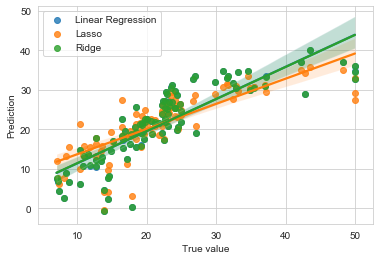

In [44]:
linear_models = linear_regs()
prediction, y_test = linear_models.fit_predict(X, y)
evaluate(prediction, y_test)

From the prediction result: Ridge is slightly better than the regular Linear regression and Lasso. A perfect prediction will be a 45 degree line. Since this is a very small dataset and linear regression is a very simle model, so eliminating features using Lasso will actually lead to worse results in this case.

### (Optional) Adding polynomial features 

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [49]:
display(X.shape)
display(X_poly.shape)

(506, 13)

(506, 105)

{'Linear Regression': 13.153805194861135,
 'Lasso': 21.293124138173457,
 'Ridge': 8.897079067231477}

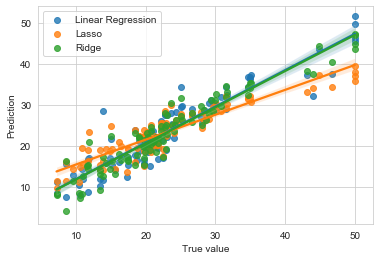

In [50]:
linear_models_new = linear_regs()
prediction_new, y_test = linear_models.fit_predict(X_poly, y)
evaluate(prediction_new, y_test)

The prediction is way better now! Right now all the hyperparameters being used is the default value. 
You can further tune the hyperparameters next for better results.